In [1]:
#Import pandas for dataframes as pd
import pandas as pd

#Import datetime module for manipulating dates and times as dt
import datetime as dt

#Import matplotlib for visualisations
from matplotlib import pyplot as plt

#Import seaborn for visualisations
import seaborn as sns

In [2]:
#Load the clinical trials data from the CSV file in same directory as df
df = pd.read_csv("completed_interventional_clinical_trials_May2021-Apr2023.csv")

In [7]:
Exploring the DataFrame

SyntaxError: invalid syntax (3214287827.py, line 1)

In [3]:
#Look at first 5 rows of data to get a better sense of the dataset.
df.head()

,Rank,NCT Number,Title,Conditions,Interventions,Sponsor/Collaborators,Phases,Enrollment,Funded Bys,Start Date,Primary Completion Date,Completion Date
0,1,NCT05861687,Recurrence Rate Comparison Between Esomeprazol...,Helicobacter Pylori Infection,Drug: Esomeprazole|Drug: Lansoprazole|Drug: Am...,Finni Kollins|Universitas Sumatera Utara,Phase 2|Phase 3,51,Other,"August 1, 2021","December 7, 2021","May 20, 2022"
1,2,NCT05851027,Evaluating the Efficacy and Safety of QL0911 i...,Chemotherapy-induced Thrombocytopenia,Drug: QL0911,"Qilu Pharmaceutical Co., Ltd.",Phase 2|Phase 3,50,Industry,"January 15, 2021","September 10, 2021","September 10, 2021"
2,3,NCT05850832,Efficacy of Esmolol Versus Magnesium Sulphate ...,Esmolol Adverse Reaction,Drug: Esmolol|Drug: Magnesium sulfate,Alexandria University,Phase 2|Phase 3,60,Other,"October 5, 2022","January 5, 2023","April 10, 2023"
3,4,NCT05846906,Effect of Oral Sildenafil Citrate on Improveme...,"Infertility, Female",Drug: Sildenafil Citrate|Drug: Clomiphene Citr...,Beni-Suef University,Phase 2|Phase 3,130,Other,"October 1, 2021","April 30, 2022","April 30, 2022"
4,5,NCT05846243,"Study on Immunogenicity, Reactogenicity and Sa...",Smallpox|Monkeypox|Cowpox|Vaccinia Virus Infec...,Biological: VAC∆6 vaccine (10⁷ PFU)|Biological...,Federal Budgetary Research Institution State R...,Phase 2|Phase 3,334,Other,"October 1, 2021","December 31, 2021","April 1, 2022"


In [4]:
#Finding out number of data entries, columns, data types, and assessing quality of dataset (no. blank cells)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7675 entries, 0 to 7674
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     7675 non-null   int64 
 1   NCT Number               7675 non-null   object
 2   Title                    7675 non-null   object
 3   Conditions               7675 non-null   object
 4   Interventions            7675 non-null   object
 5   Sponsor/Collaborators    7675 non-null   object
 6   Phases                   7675 non-null   object
 7   Enrollment               7675 non-null   int64 
 8   Funded Bys               7675 non-null   object
 9   Start Date               7675 non-null   object
 10  Primary Completion Date  7675 non-null   object
 11  Completion Date          7674 non-null   object
dtypes: int64(2), object(10)
memory usage: 719.7+ KB


In [11]:
#Get shape of data df.shape Don't need to get shape as I can see it's 7675 entries and 12 columns

(7675, 12)

In [5]:
#Checking out enrollment integer. No point with rank as it's just the index basically.
df.describe()

,Rank,Enrollment
count,7675.000000,7675.000000
mean,3838.000000,305.338632
std,2215.725991,5690.093687
min,1.000000,1.000000
25%,1919.500000,27.000000
50%,3838.000000,58.000000
75%,5756.500000,143.000000
max,7675.000000,477102.000000


In [ ]:
Cleaning

In [6]:
#Wnat to get rid of anything with a null value. Confirming here that there is one null completion date. 
#In reality, I care only about Primary Completion Date though.
df.isna().any()

Rank                       False
NCT Number                 False
Title                      False
Conditions                 False
Interventions              False
Sponsor/Collaborators      False
Phases                     False
Enrollment                 False
Funded Bys                 False
Start Date                 False
Primary Completion Date    False
Completion Date             True
dtype: bool

In [7]:
#Confirming that it's only one row with a blank
df.isna().sum()

Rank                       0
NCT Number                 0
Title                      0
Conditions                 0
Interventions              0
Sponsor/Collaborators      0
Phases                     0
Enrollment                 0
Funded Bys                 0
Start Date                 0
Primary Completion Date    0
Completion Date            1
dtype: int64

In [8]:
#Getting rid of the blank row.
df.dropna()

,Rank,NCT Number,Title,Conditions,Interventions,Sponsor/Collaborators,Phases,Enrollment,Funded Bys,Start Date,Primary Completion Date,Completion Date
0,1,NCT05861687,Recurrence Rate Comparison Between Esomeprazol...,Helicobacter Pylori Infection,Drug: Esomeprazole|Drug: Lansoprazole|Drug: Am...,Finni Kollins|Universitas Sumatera Utara,Phase 2|Phase 3,51,Other,"August 1, 2021","December 7, 2021","May 20, 2022"
1,2,NCT05851027,Evaluating the Efficacy and Safety of QL0911 i...,Chemotherapy-induced Thrombocytopenia,Drug: QL0911,"Qilu Pharmaceutical Co., Ltd.",Phase 2|Phase 3,50,Industry,"January 15, 2021","September 10, 2021","September 10, 2021"
2,3,NCT05850832,Efficacy of Esmolol Versus Magnesium Sulphate ...,Esmolol Adverse Reaction,Drug: Esmolol|Drug: Magnesium sulfate,Alexandria University,Phase 2|Phase 3,60,Other,"October 5, 2022","January 5, 2023","April 10, 2023"
3,4,NCT05846906,Effect of Oral Sildenafil Citrate on Improveme...,"Infertility, Female",Drug: Sildenafil Citrate|Drug: Clomiphene Citr...,Beni-Suef University,Phase 2|Phase 3,130,Other,"October 1, 2021","April 30, 2022","April 30, 2022"
4,5,NCT05846243,"Study on Immunogenicity, Reactogenicity and Sa...",Smallpox|Monkeypox|Cowpox|Vaccinia Virus Infec...,Biological: VAC∆6 vaccine (10⁷ PFU)|Biological...,Federal Budgetary Research Institution State R...,Phase 2|Phase 3,334,Other,"October 1, 2021","December 31, 2021","April 1, 2022"
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,7671,NCT00445965,Iodine I 131 Monoclonal Antibody 3F8 in Treati...,Brain and Central Nervous System Tumors|Intrao...,Genetic: DNA analysis|Other: immunologic techn...,Memorial Sloan Kettering Cancer Center,Phase 2,78,Other,01/01/2006,"February 1, 2023","February 1, 2023"
7671,7672,NCT00389610,Adjuvant GVAX Vaccine Therapy in Patients With...,Pancreatic Cancer,Biological: GVAX pancreas vaccine,Sidney Kimmel Comprehensive Cancer Center at J...,Phase 2,56,Other|NIH,"September 11, 2006","October 11, 2021","December 10, 2022"
7672,7673,NCT00370890,A Trial of Adjuvant Chemotherapy in Nasopharyn...,Nasopharyngeal Cancer,Drug: Adjuvant chemotherapy (gemcitabine and c...,Chinese University of Hong Kong|Hong Kong Naso...,Phase 3,104,Other,"September 4, 2006","October 26, 2021","October 26, 2021"
7673,7674,NCT00301457,Different Durations of Adjuvant Anastrozole Th...,Breast Cancer,Drug: Anastrozole,Maastricht University Medical Center,Phase 3,1914,Other,01/06/2006,01/04/2022,01/04/2022


In [ ]:
Sorting

In [ ]:
#I want to sort by the length of the study so I need a new column with length of study to work with.

In [10]:
#Having seen the datatypes are not datetime, I want to convert now.
df["Start Date"] = pd.to_datetime(df["Start Date"])
df["Primary Completion Date"] = pd.to_datetime(df["Primary Completion Date"])
df["Completion Date"] = pd.to_datetime(df["Completion Date"])
print(df.dtypes)

Rank                                int64
NCT Number                         object
Title                              object
Conditions                         object
Interventions                      object
Sponsor/Collaborators              object
Phases                             object
Enrollment                          int64
Funded Bys                         object
Start Date                 datetime64[ns]
Primary Completion Date    datetime64[ns]
Completion Date            datetime64[ns]
dtype: object


In [11]:
#Adding columns to capture the days to last primary outcome data point and the last data point.
df["Days to Last Primary Outcome Measure)"] = (df["Primary Completion Date"] - df["Start Date"]).dt.days
df["Days to Last Data Point"] = (df["Completion Date"] - df["Start Date"]).dt.days
print(df.head())

   Rank   NCT Number                                              Title  \
0     1  NCT05861687  Recurrence Rate Comparison Between Esomeprazol...   
1     2  NCT05851027  Evaluating the Efficacy and Safety of QL0911 i...   
2     3  NCT05850832  Efficacy of Esmolol Versus Magnesium Sulphate ...   
3     4  NCT05846906  Effect of Oral Sildenafil Citrate on Improveme...   
4     5  NCT05846243  Study on Immunogenicity, Reactogenicity and Sa...   

                                          Conditions  \
0                      Helicobacter Pylori Infection   
1              Chemotherapy-induced Thrombocytopenia   
2                           Esmolol Adverse Reaction   
3                                Infertility, Female   
4  Smallpox|Monkeypox|Cowpox|Vaccinia Virus Infec...   

                                       Interventions  \
0  Drug: Esomeprazole|Drug: Lansoprazole|Drug: Am...   
1                                       Drug: QL0911   
2              Drug: Esmolol|Drug: Magnesium

In [ ]:
#df.sort_values("study_length") and df.sort_values("study_length", ascedning=False) for descending values
#sort by mutliple values here, study length and number enrolled. df.sort_values(["study_length", "enrollment"])
#can subset columns by saying df["columnName"] or multiple columns via df[["columnName1", "columnName2"]] May want to do this to create a new df ad remove irrelevant columns
#can subset rows with a condition like df[df["enrollment"] > 50] or df[df["condition"] == "cancer"] to see if any additional information of interest

In [10]:
#Get type of data in dataframe
df.dtypes

Rank                        int64
NCT Number                 object
Title                      object
Conditions                 object
Interventions              object
Sponsor/Collaborators      object
Phases                     object
Enrollment                  int64
Funded Bys                 object
Start Date                 object
Primary Completion Date    object
Completion Date            object
dtype: object

In [ ]:
"""NCT, Sponsor, Title, Summary, Phase, Status, and Condition are all categorical variables. This makes sense
becasue even though some are numbers, like phase, they are not continuous and are a limited number of categories.
Start_Year, Start_Month and Enrollment should be integerse."""

,Rank,NCT Number,Title,Conditions,Interventions,Sponsor/Collaborators,Phases,Enrollment,Funded Bys,Start Date,Primary Completion Date,Completion Date
0,1,NCT05861687,Recurrence Rate Comparison Between Esomeprazol...,Helicobacter Pylori Infection,Drug: Esomeprazole|Drug: Lansoprazole|Drug: Am...,Finni Kollins|Universitas Sumatera Utara,Phase 2|Phase 3,51,Other,"August 1, 2021","December 7, 2021","May 20, 2022"
1,2,NCT05851027,Evaluating the Efficacy and Safety of QL0911 i...,Chemotherapy-induced Thrombocytopenia,Drug: QL0911,"Qilu Pharmaceutical Co., Ltd.",Phase 2|Phase 3,50,Industry,"January 15, 2021","September 10, 2021","September 10, 2021"
2,3,NCT05850832,Efficacy of Esmolol Versus Magnesium Sulphate ...,Esmolol Adverse Reaction,Drug: Esmolol|Drug: Magnesium sulfate,Alexandria University,Phase 2|Phase 3,60,Other,"October 5, 2022","January 5, 2023","April 10, 2023"
3,4,NCT05846906,Effect of Oral Sildenafil Citrate on Improveme...,"Infertility, Female",Drug: Sildenafil Citrate|Drug: Clomiphene Citr...,Beni-Suef University,Phase 2|Phase 3,130,Other,"October 1, 2021","April 30, 2022","April 30, 2022"
4,5,NCT05846243,"Study on Immunogenicity, Reactogenicity and Sa...",Smallpox|Monkeypox|Cowpox|Vaccinia Virus Infec...,Biological: VAC∆6 vaccine (10⁷ PFU)|Biological...,Federal Budgetary Research Institution State R...,Phase 2|Phase 3,334,Other,"October 1, 2021","December 31, 2021","April 1, 2022"


In [11]:
#Get a summary of the numerical variables.
df.describe()

,Rank,Enrollment
count,7675.000000,7675.000000
mean,3838.000000,305.338632
std,2215.725991,5690.093687
min,1.000000,1.000000
25%,1919.500000,27.000000
50%,3838.000000,58.000000
75%,5756.500000,143.000000
max,7675.000000,477102.000000


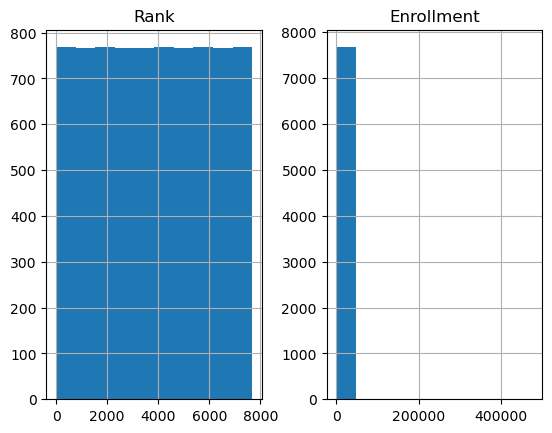

In [16]:
#Plot histograms of numerical variables.
df.hist()
plt.show()

In [17]:
#Get summary of categorical features
df.describe(include = ["object"])

,NCT Number,Title,Conditions,Interventions,Sponsor/Collaborators,Phases,Funded Bys,Start Date,Primary Completion Date,Completion Date
count,7675,7675,7675,7675,7675,7675,7675,7675,7675,7674
unique,7675,7671,4293,7204,4067,6,30,2206,740,748
top,NCT05861687,A Study to Evaluate the Efficacy and Safety of...,Healthy,Drug: Ketamine,Pfizer,Phase 1,Industry,"January 1, 2021","December 31, 2021","June 30, 2022"
freq,1,2,342,10,120,2510,3800,35,72,80


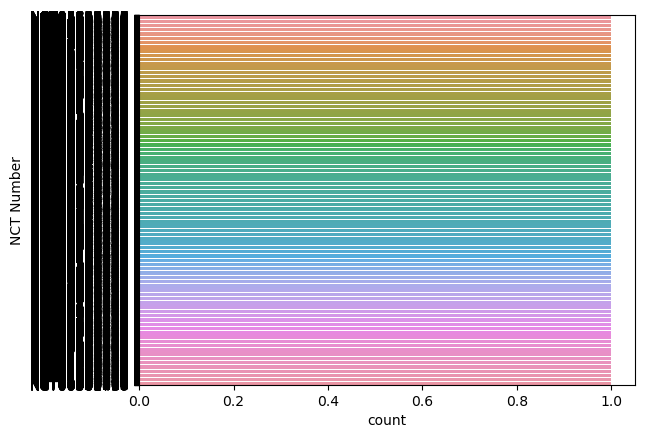

C:\Users\muire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\muire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\muire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


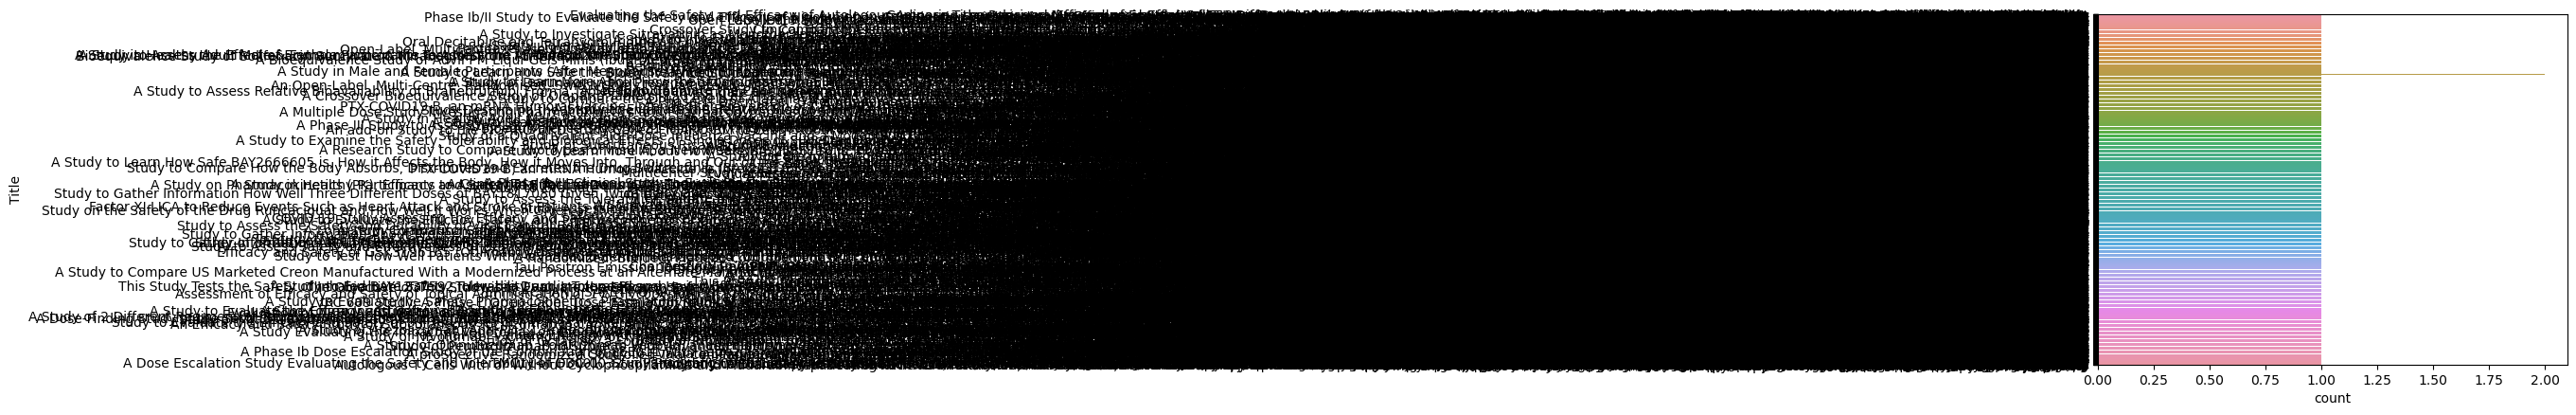

C:\Users\muire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


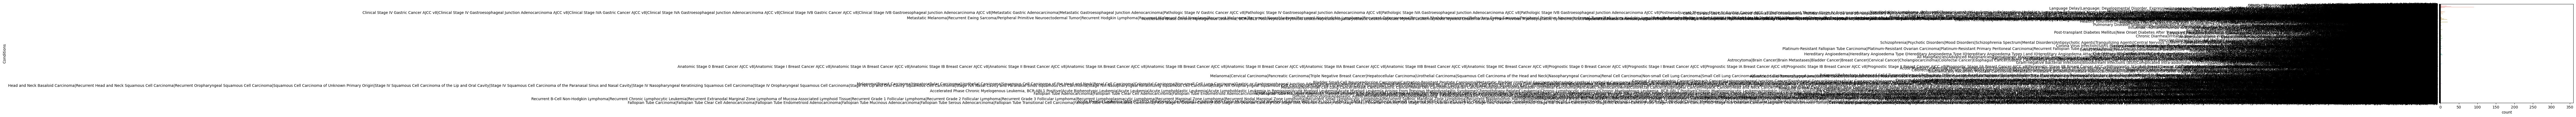

C:\Users\muire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\muire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\muire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65307 (\N{FULLWIDTH SEMICOLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\muire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\muire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
#Show bar plots for categorical features
for feature in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()